In [ ]:
from analysis import calculate_dff
from analysis import detrend
from analysis import extract_traces
from analysis import get_roi_masks
from analysis import moving_average
from glob import glob
from roifile import ImagejRoi
from skimage import draw
from visualization import plot_dff
from visualization import plot_traces
from visualization import show_one_image
from wfield.io import mmap_dat

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import tifffile as tiff

In [3]:
# root = '/home/wrx/Data_WF/WF_WRX'
root = '/home/wrx/Data_DOM/Widefield'
mouse_id = 'X1'
date = '20250318'
date_folder = os.path.join(root, mouse_id, date)
treatment = 'DOM'
folder = os.path.join(date_folder, treatment)

In [4]:
parameters_path = os.path.join(folder, 'parameters.npy')
parameters = np.load(parameters_path, allow_pickle=True).item()

(435, 395)


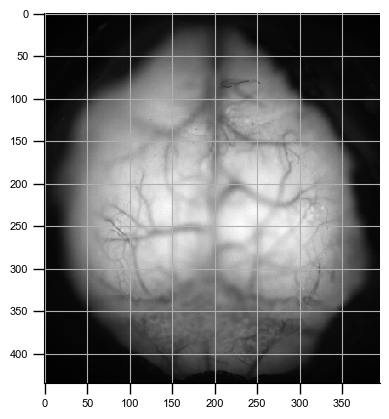

In [8]:
reference_file = os.path.join(folder, 'reference.tif')
reference_image = tiff.imread(reference_file)
image_size = reference_image[0].shape
print(image_size)
show_one_image(reference_image[0])

/home/wrx/Data_DOM/Widefield/X1/20250318/DOM/RoiSet.zip


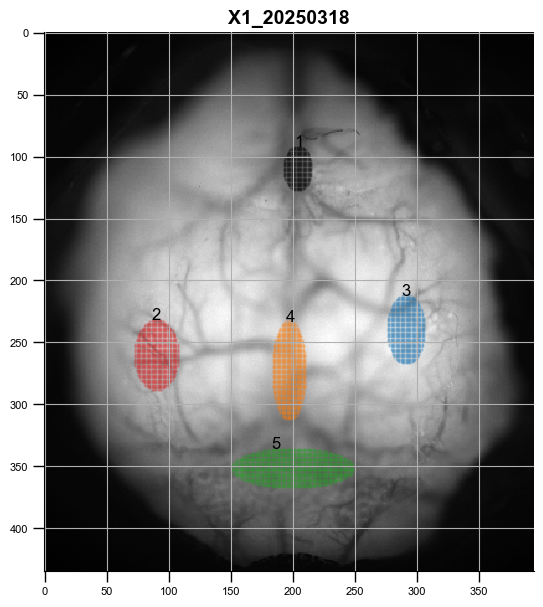

In [9]:
rois_name = 'RoiSet.zip'
rois_path = os.path.join(folder, rois_name)
print(rois_path)

roi_masks = get_roi_masks(rois_path)

fig, ax = plt.subplots(figsize=(7, 7))

ax.imshow(reference_image[0], cmap='gray')
ax.grid()
for i, roi_mask in enumerate(roi_masks):
    ax.scatter(roi_mask[1], roi_mask[0], s=1, label=f'ROI {i+1}', alpha=0.3,
        marker='.')
    ax.text(roi_mask[1][0], roi_mask[0][0], f'{i+1}', fontsize=12)

ax.set_aspect('equal')
# ax.legend(loc='outside upper right')
title = '{}_{}'.format(mouse_id, date)
ax.set_title(title)
plt.show()

In [5]:
dat = mmap_dat(glob(os.path.join(folder, '*uint16.bin'))[0])
print(dat.shape)

(72000, 2, 435, 395)


In [10]:
F_chan1 = extract_traces(dat[:, 0], roi_masks)
F_chan2 = extract_traces(dat[:, 1], roi_masks)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [04:07<00:00, 49.45s/it] 


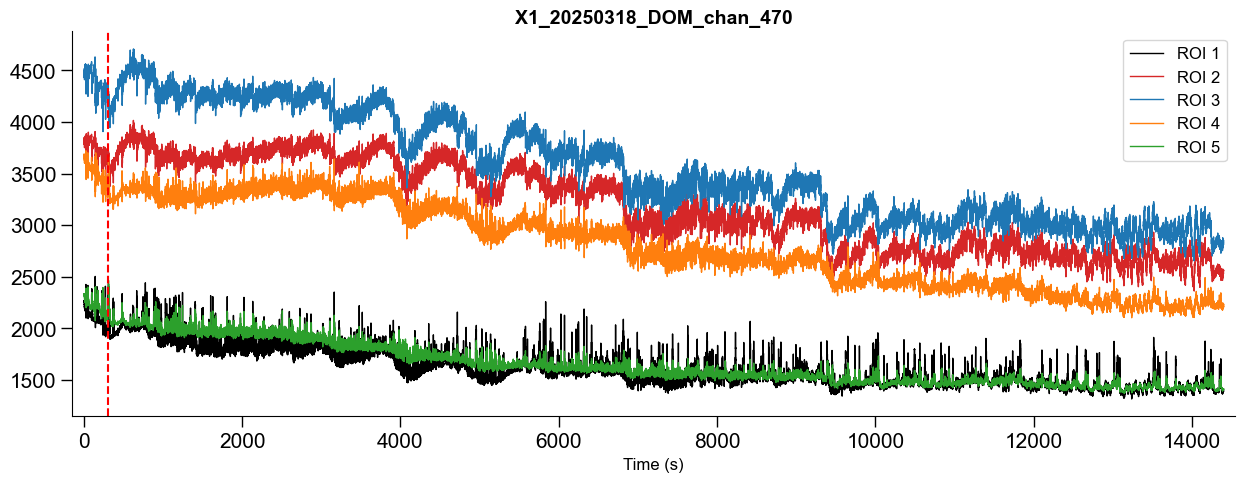

In [30]:
labels = [f'ROI {i+1}' for i in range(len(roi_masks))]
title = f'{mouse_id}_{date}_{treatment}_chan_470'
plot_traces(F_chan1.T, data_rate=parameters['frame_rate'], labels=labels,
    title=title, vlines=[300])



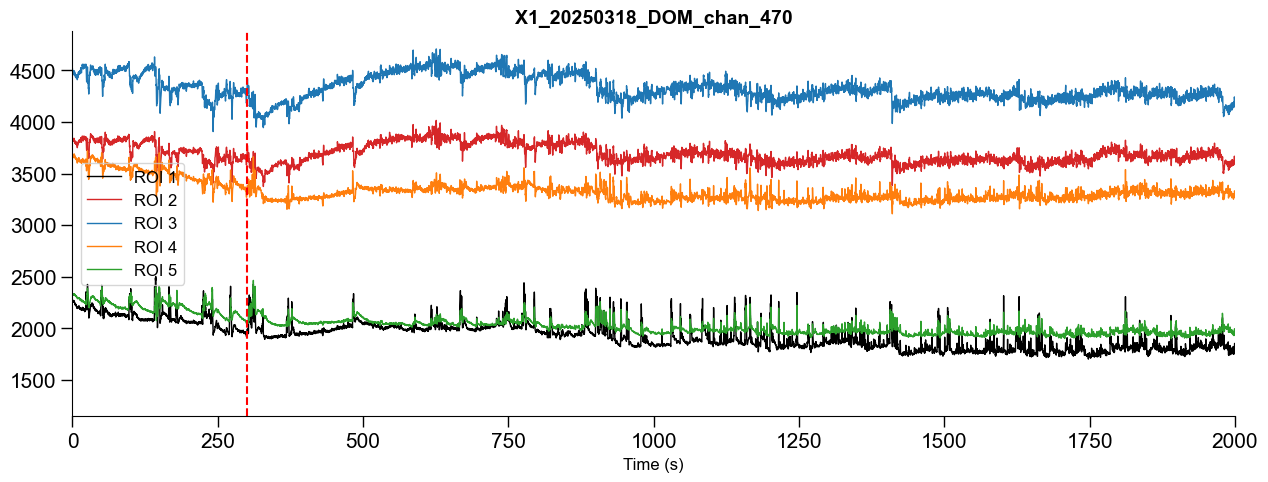

In [ ]:
plot_traces(F_chan1.T, data_rate=parameters['frame_rate'], labels=labels,
    title=title, xlim=[0, 2000], vlines=[300])

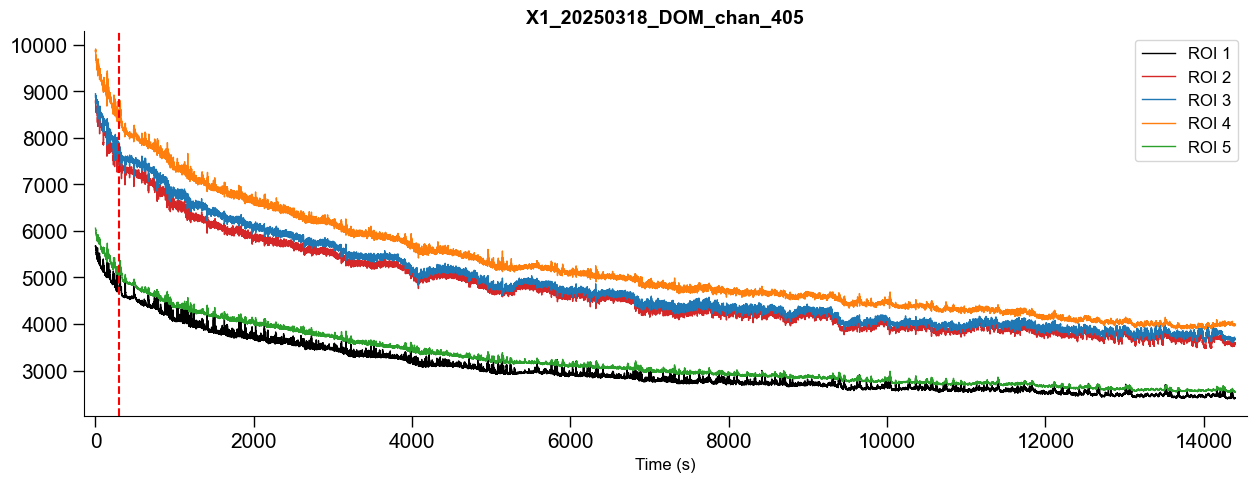

In [ ]:
title = f'{mouse_id}_{date}_{treatment}_chan_405'
plot_traces(F_chan2.T, data_rate=parameters['frame_rate'], labels=labels,
    title=title, vlines=[300])

In [55]:
F_chan1_detrend = detrend(F_chan1.T)
F_chan2_detrend = detrend(F_chan2.T)

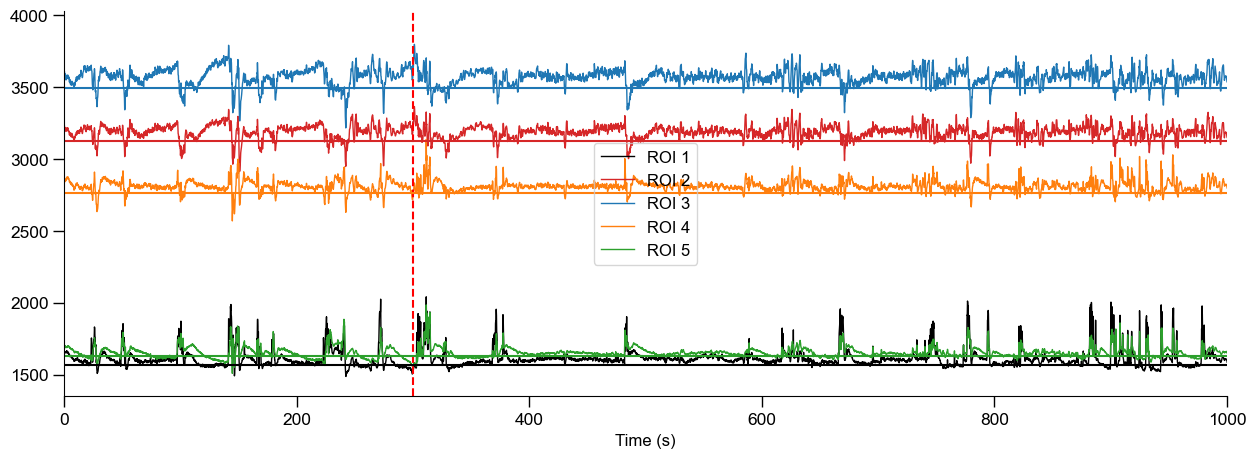

In [44]:
plot_traces(F_chan1_detrend, data_rate=parameters['frame_rate'], labels=labels,
    vlines=[300], hlines=baseline, xlim=[0,1000])

In [ ]:
F_chan1_dff = calculate_dff(F_chan1_detrend)
F_chan2_dff = calculate_dff(F_chan2_detrend)
F_corr = F_chan1_dff - F_chan2_dff

(72000, 5)
(72000, 5)


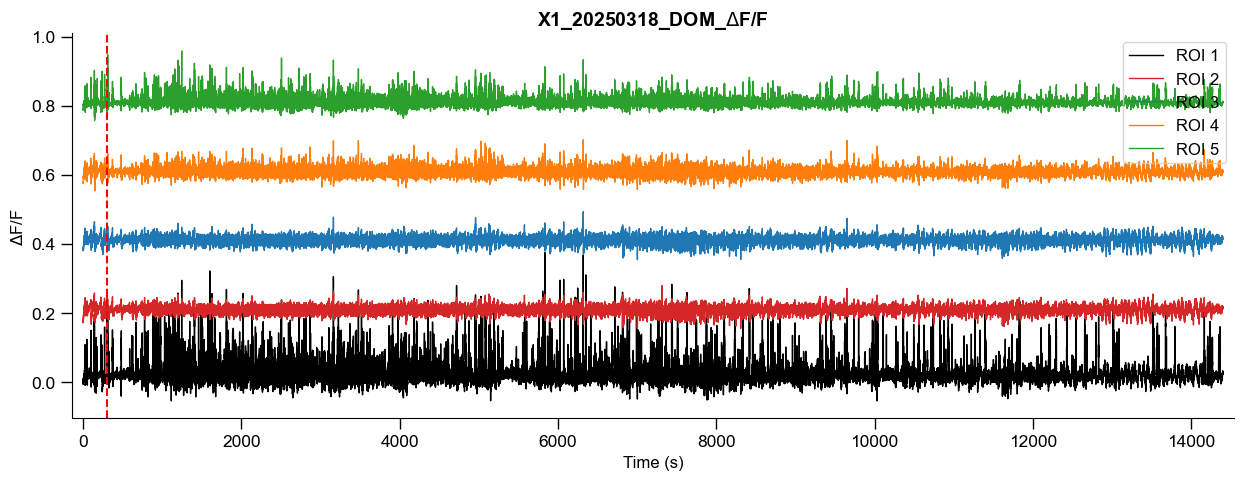

In [ ]:
title = f'{mouse_id}_{date}_{treatment}_$\Delta $F/F'
ylabel = '$\Delta $F/F'
print(ylabel)
plot_dff(F_corr, data_rate=parameters['frame_rate'],
    labels=labels, vlines=[300], ylabel=ylabel, title=title, step=0.2)